In [2]:
#Assignment : google sklearn Ridge, sklearn Lasso and elastic

#Need to perform all the assumptions 

# Performing Machine Learning to Understand the Boston Dataset Using Ridge Regrassion model

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [6]:
#boston dataset  from sklearn
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [12]:
print(boston.data) #input features

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [13]:
print(boston.target) # output features

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [14]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [15]:
dataset['PRICE']=boston.target

In [16]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
dataset.isna().sum()
#check the missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [22]:
dataset.corr()
#check the correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

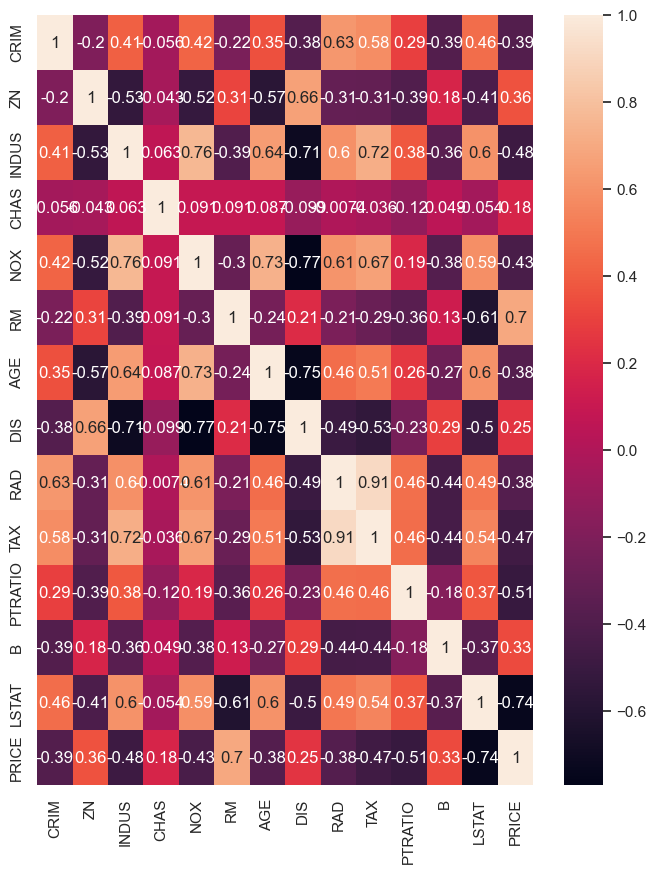

In [23]:
sns.set(rc={'figure.figsize':(8,10)})
sns.heatmap(dataset.corr(), annot = True)
#heatmap of correlation matrix

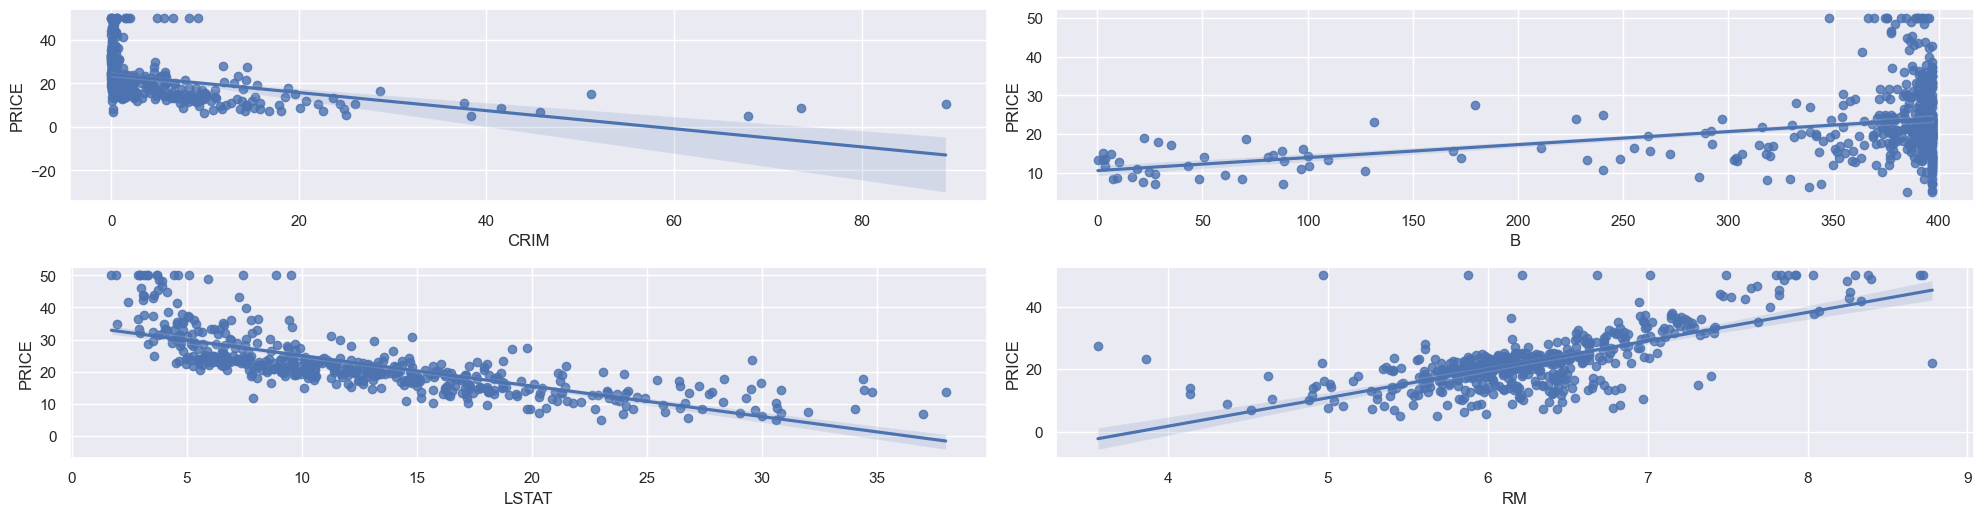

In [29]:
#Scatter Plot

features = ['CRIM','B','LSTAT','RM']
plt.subplots(figsize=(20,10))
for index, feature in enumerate(features):
    plt.subplot(len(features),2,index+1)
    sns.regplot(x=dataset[feature], y=dataset['PRICE'])
    plt.xlabel(feature)
    plt.tight_layout()

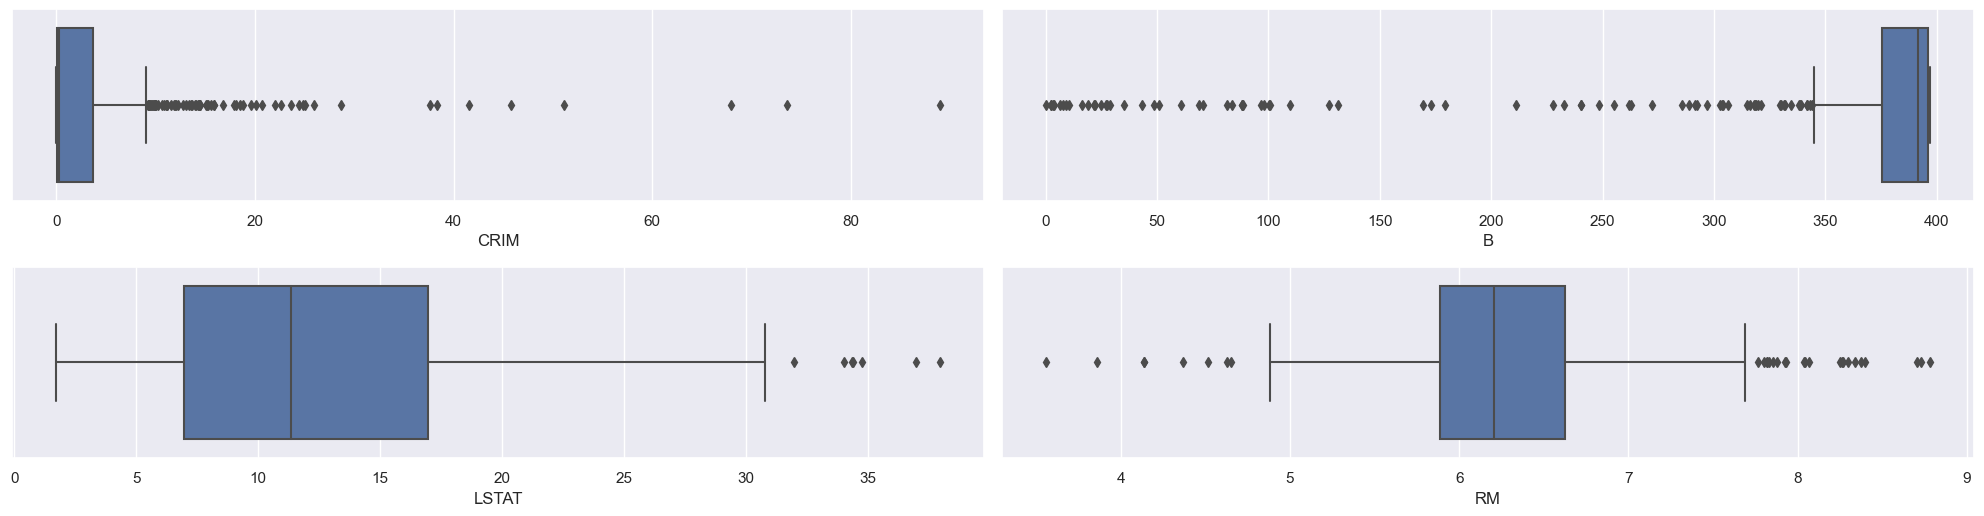

In [32]:
#Box Plot for checking the outliers

features = ['CRIM','B','LSTAT','RM']
plt.subplots(figsize=(20,10))
for index, feature in enumerate(features):
    plt.subplot(len(features),2,index+1)
    sns.boxplot(x=dataset[feature])
    plt.xlabel(feature)
    plt.tight_layout()

In [33]:
##Training the point
#Independent features X and Dependent features

X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]

In [35]:
#Creating training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state =42)

In [36]:
print(type(X_train), len(X_train), type(y_train), len(y_train))

<class 'pandas.core.frame.DataFrame'> 379 <class 'pandas.core.series.Series'> 379


In [37]:
print(type(X_test), len(X_test), type(y_test), len(y_test))

<class 'pandas.core.frame.DataFrame'> 127 <class 'pandas.core.series.Series'> 127


In [38]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0.0,0.5810,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [39]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Starndardizing

In [42]:
#Mean and Standard Deviation

X_train = scaler.fit_transform(X_train)

In [43]:
x_test = scaler.transform(X_test)

In [46]:
##Using Ridge Regression for Model training

from sklearn.linear_model import Ridge

In [47]:
ridge = Ridge()

In [48]:
ridge.fit(X_train,  y_train)

Ridge()

In [49]:
print(ridge.coef_)

[-1.05413713  0.66437555  0.3128819   0.74118349 -1.89877304  3.14706658
 -0.25666106 -2.91851804  2.1356466  -1.58202618 -2.07557365  1.14929024
 -3.68300256]


In [50]:
print(ridge.intercept_)

22.907915567282352


In [51]:
ridge_prediction = ridge.predict(X_test)
ridge_prediction

array([  -56.81301892,    65.5747618 ,  -757.86115539,   -57.82424315,
        -654.13030875,  -257.62500133,  -118.84108959,  -350.80223029,
        -626.76939014,  -226.42062873,   -56.79157832,  -121.30851662,
       -1116.30152549,  -241.91492922,   -68.66456149,  -636.89755511,
          56.2618397 ,  -731.29588335,    92.85490626,  -650.00529494,
          86.74091206,    50.48293276,  -185.30798627,   -37.18283055,
        -725.59834139,  -701.42088358,  -214.15367481, -1098.60689888,
         -70.27864301,  -225.1689264 ,   -79.70182425,   -36.75619458,
        -636.97470962,  -634.91601584,  -732.04979408,  -401.42435181,
          37.74274096,    49.27509769,   -66.59604518,   -80.18739327,
        -252.70673602,    92.75784479,   150.11597347,  -147.15463556,
         -24.33812948,  -646.63871206,  -170.25395814,   -69.07642646,
        -636.26235609,   -33.50628341,   -93.58378827,   105.34717705,
        -126.19815881,  -194.62864777,    40.37279971,  -618.14423303,
      

Text(0, 0.5, 'Predition for Test data')

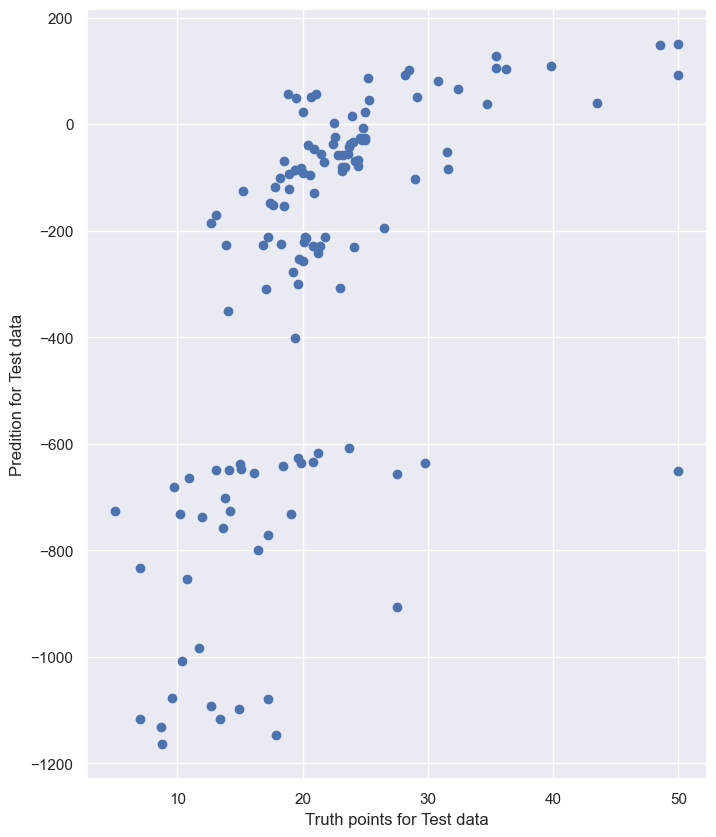

In [54]:
plt.scatter(y_test, ridge_prediction)
plt.xlabel('Truth points for Test data')
plt.ylabel('Predition for Test data')

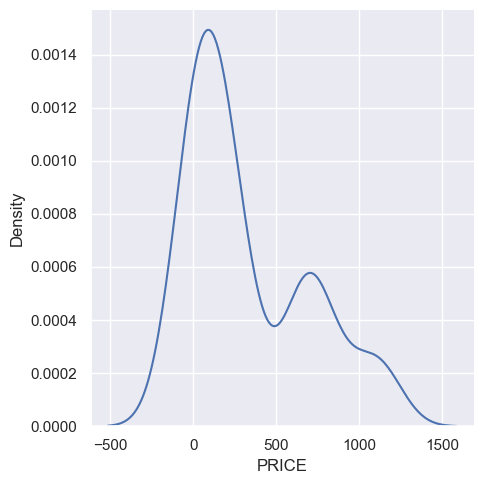

In [55]:
residuals = y_test - ridge_prediction
sns.displot(residuals, kind='kde')

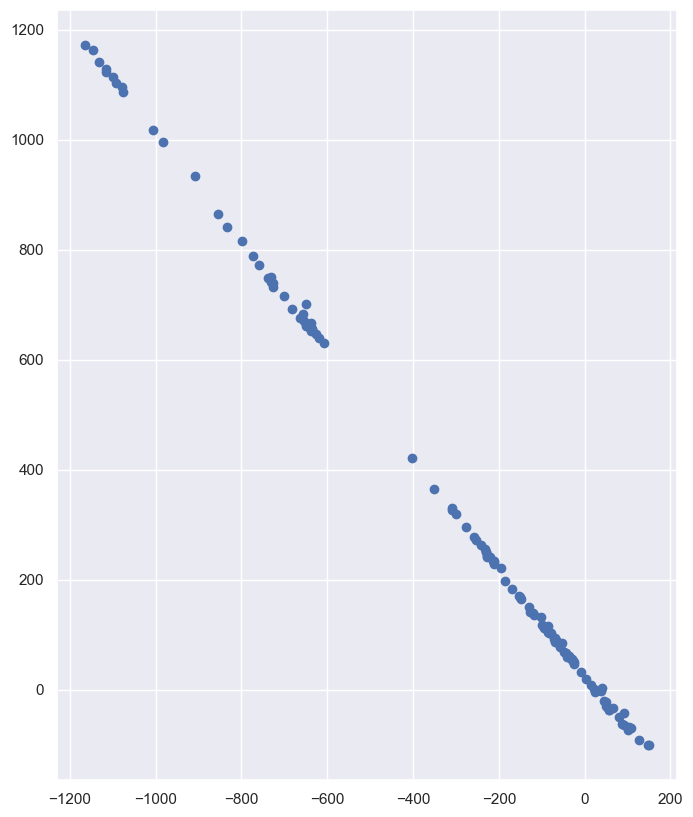

In [58]:
plt.scatter(ridge_prediction, residuals)

In [59]:
#determining cost function 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
MSE = mean_squared_error(y_test, ridge_prediction)
MAE = mean_absolute_error(y_test, ridge_prediction)

print("Mean Squared Error", MSE)
print("Mean Absolute Error", MAE)
print("Root Mean Squared Error", np.sqrt(MSE))

Mean Squared Error 237466.67871559202
Mean Absolute Error 341.06082931197864
Root Mean Squared Error 487.3055291247905


In [61]:
#Performation Metrics

from sklearn.metrics import r2_score

In [62]:
score = r2_score(y_test, ridge_prediction)

adj_score = 1 - ((1-score)* (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1)

In [64]:
print('R Squared', score)


R Squared -3390.0661826780583


In [65]:
print('Adjusted R Squared', adj_score)

Adjusted R Squared -3780.1888408622594


In [66]:
adj_score

-3780.1888408622594

# Lasso Regression Model

In [67]:
from sklearn.linear_model import Lasso

In [68]:
lasso = Lasso()

In [69]:
lasso.fit(X_train,y_train)

Lasso()

In [70]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [73]:
print(lasso.coef_)

[-0.          0.         -0.          0.06146656 -0.          2.99385797
 -0.         -0.         -0.         -0.         -1.23313247  0.3951722
 -3.55963652]


In [74]:
print(lasso.intercept_)

22.907915567282352


In [76]:
lasso_prediction = lasso.predict(X_test)
lasso_prediction

array([145.75800002, 165.77707183, 105.87219991, 152.21709159,
       107.55290284, 123.69796743, 107.06959502,  82.60719509,
       127.05828452, 123.11000872, 113.61761789, 114.08668201,
       -85.22562474, 127.27468442, 128.60103003, 125.45352612,
       104.29799535,  50.98021288, 173.94405522, 108.82328702,
       152.03916662, 151.86103081,  75.99742994, 137.23250456,
        86.5406576 ,  89.00431443, 141.55346904, -45.81973301,
       111.80305637, 123.23115621, 123.67247863, 149.19151345,
       128.89505409, 128.25663175,  70.99591635,  69.18150036,
       163.35918702, 137.52900012, 116.69066458, 140.13585423,
        96.96179648, 150.76299429, 172.91627249, 126.59755724,
       143.7879796 , 110.06493998,  90.53671778, 146.16202938,
       115.31912878, 162.842461  , 131.76186388, 164.05510425,
       105.6078596 , 146.45660434, 172.22857053, 132.8067369 ,
       113.92876007, 164.76288799, 141.82286605, 104.19812708,
       141.36534518, 161.87599801, 157.982729  ,  85.93

Text(0, 0.5, 'Test prediction data')

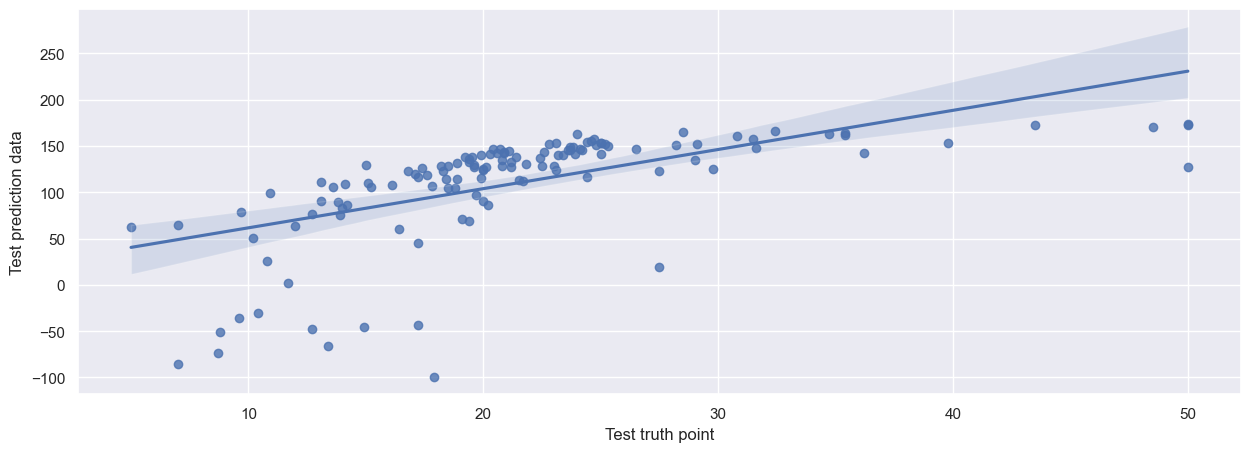

In [78]:
plt.subplots(figsize = (15,5))
sns.regplot(x = y_test, y = lasso_prediction)
plt.xlabel('Test truth point')
plt.ylabel('Test prediction data')

Text(0, 0.5, 'Test prediction data')

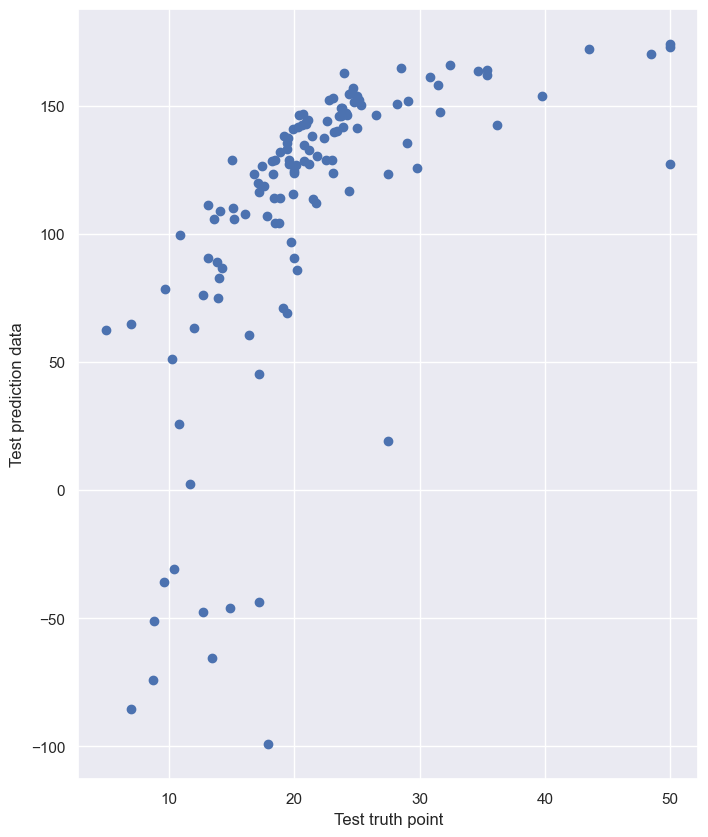

In [79]:
plt.scatter(y_test, lasso_prediction)
plt.xlabel('Test truth point')
plt.ylabel('Test prediction data')

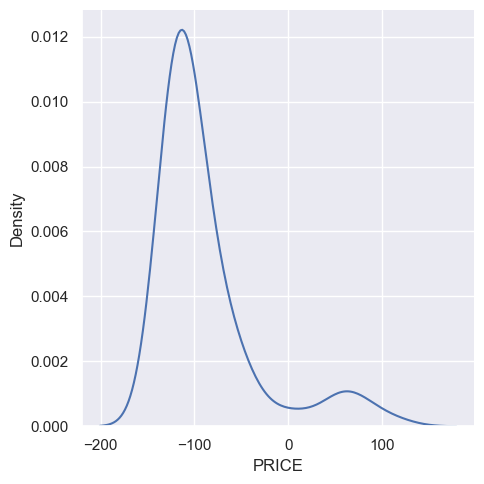

In [80]:
residuals1 = y_test - lasso_prediction
sns.displot(residuals1, kind="kde")

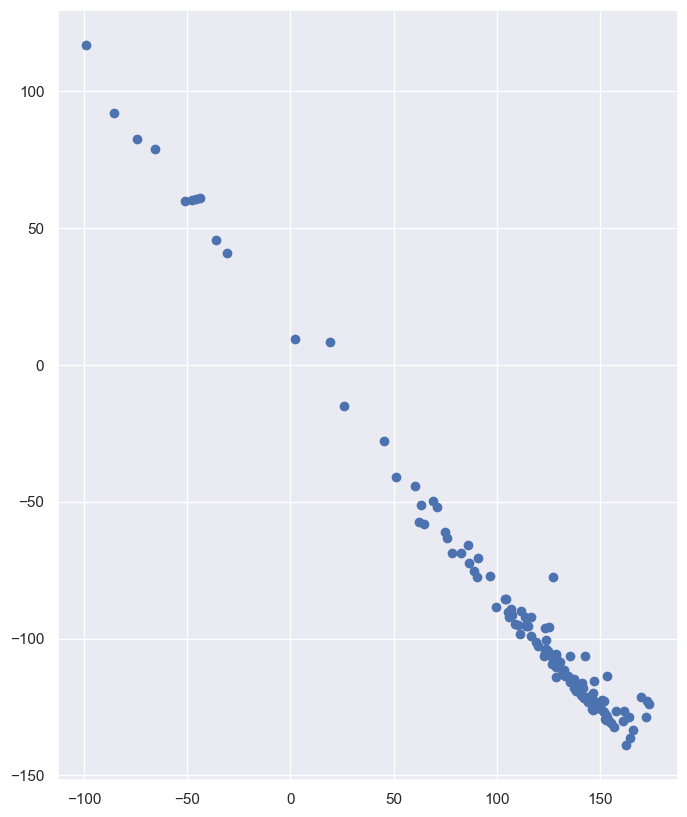

In [83]:
plt.scatter(lasso_prediction, residuals1)

In [85]:
#Cost functions

MSE1 = mean_squared_error(y_test, lasso_prediction)
MAE1 = mean_absolute_error(y_test, lasso_prediction)

print("Mean Squared Error" , MSE1)
print("Mean Absolute Error" , MAE1)
print("Root Mean Squared Error", np.sqrt(MAE1))

Mean Squared Error 10769.801996779595
Mean Absolute Error 99.7546471403743
Root Mean Squared Error 9.987724823020221


In [86]:
#Performance Metrics

score1 = r2_score(y_test, lasso_prediction)
adj_score= 1-((1-score)* (len(y_test) -1))/(len(y_test)-X_test.shape[1]-1)

In [87]:
print('R Squared', score)
print('Adjusted R Squared', adj_score)

R Squared -3390.0661826780583
Adjusted R Squared -3780.1888408622594


# Elastic Net Regression Model

In [88]:
from sklearn.linear_model import ElasticNet

In [89]:
elasticNet= ElasticNet()

In [90]:
elasticNet.fit(X_train, y_train)

ElasticNet()

In [91]:
elasticNet.coef_

array([-0.41994436,  0.        , -0.18220044,  0.47897188, -0.22326554,
        2.52909856, -0.        , -0.        , -0.        , -0.31327967,
       -1.22994547,  0.58611457, -2.46048784])

In [92]:
print(elasticNet.intercept_)

22.90791556728235


In [94]:
elasticNet_prediction = elasticNet.predict(X_test)
elasticNet_prediction

array([ 1.34661919e+02,  1.61910405e+02, -3.04707093e+01,  1.32517522e+02,
       -1.70358773e+01,  7.81805331e+01,  1.01832313e+02,  3.93086208e+01,
        1.02195509e-01,  8.74232125e+01,  1.17638147e+02,  1.04927184e+02,
       -2.61068120e+02,  8.46373115e+01,  1.22112740e+02, -7.39836262e+00,
        1.29648201e+02, -6.44790028e+01,  1.68799506e+02, -1.42932533e+01,
        1.60925610e+02,  1.51718215e+02,  6.87666971e+01,  1.31858308e+02,
       -5.28834240e+01, -4.16479963e+01,  9.73542309e+01, -2.43138161e+02,
        1.14689848e+02,  8.73813672e+01,  1.19426275e+02,  1.38529976e+02,
       -4.20839714e+00, -3.92040884e+00, -5.89680941e+01,  3.03175873e+00,
        1.62296072e+02,  1.50172750e+02,  1.14398607e+02,  1.19905791e+02,
        6.90288657e+01,  1.61628739e+02,  1.76203056e+02,  1.04895134e+02,
        1.40093966e+02, -1.34281076e+01,  7.83640798e+01,  1.26248296e+02,
       -7.69033622e+00,  1.47819781e+02,  1.20358081e+02,  1.72412987e+02,
        1.00883670e+02,  

Text(0, 0.5, 'Test prediction data')

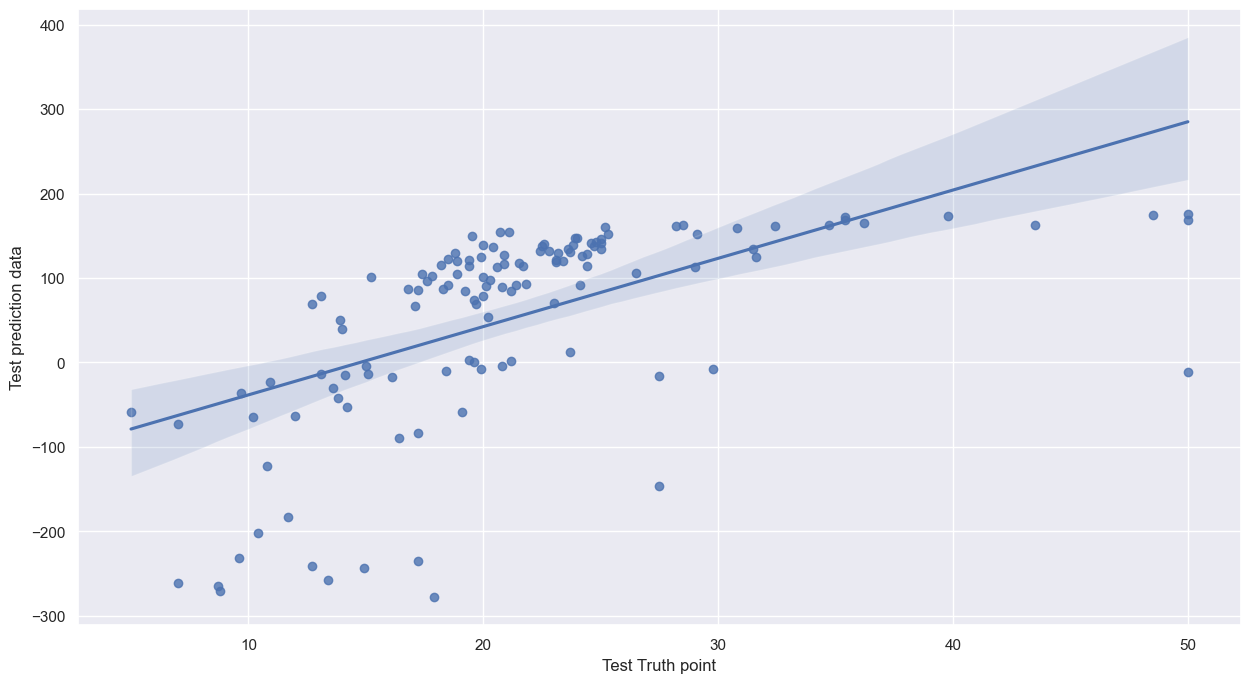

In [96]:
plt.subplots(figsize=(15,8))
sns.regplot(x = y_test, y = elasticNet_prediction)
plt.xlabel('Test Truth point')
plt.ylabel('Test prediction data')

Text(0, 0.5, 'Test Prediction data')

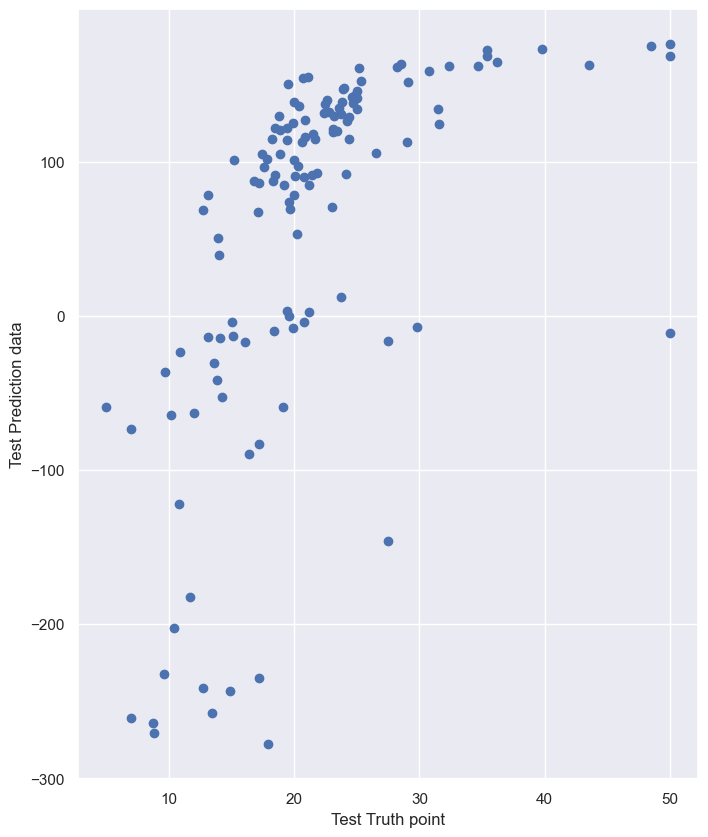

In [97]:
plt.scatter(y_test, elasticNet_prediction)
plt.xlabel('Test Truth point')
plt.ylabel('Test Prediction data')

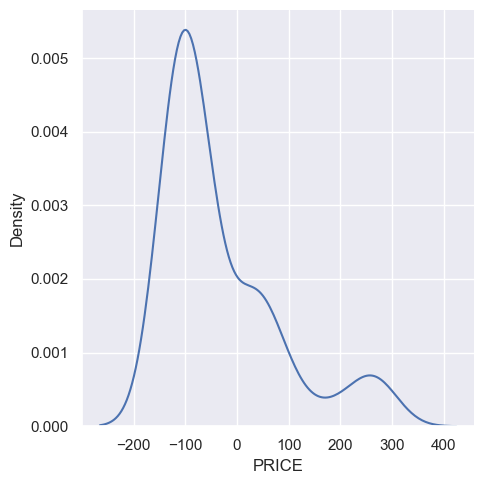

In [98]:
residuals2 = y_test - elasticNet_prediction
sns.displot(residuals2, kind='kde')

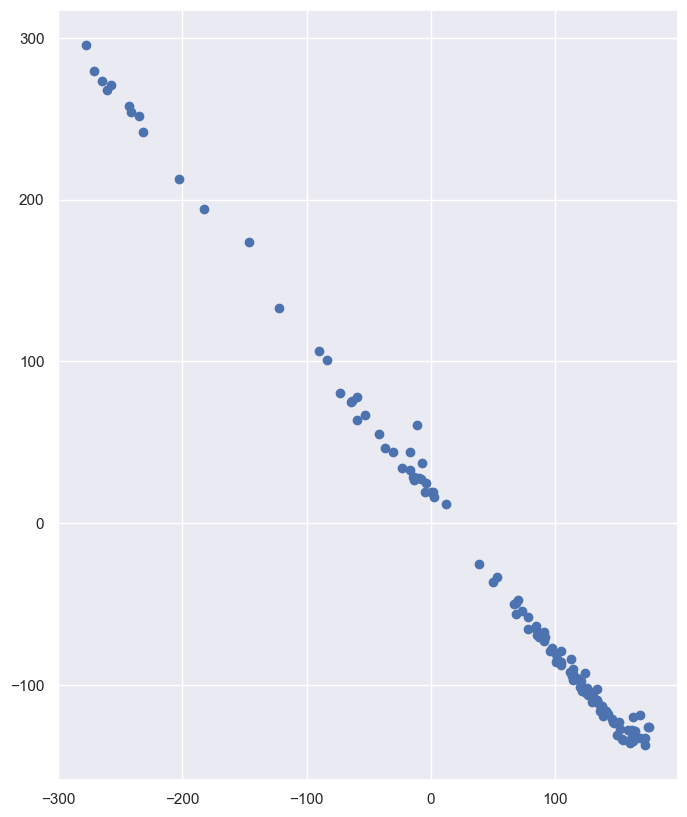

In [99]:
plt.scatter(elasticNet_prediction,residuals2)

In [101]:
#cost function

MSE2 = mean_squared_error(y_test, elasticNet_prediction)
MAE2 = mean_absolute_error(y_test, elasticNet_prediction)

print("Mean Squared Error", MSE2)
print("Mean Absolute Error", MAE2)
print("Root Mean Squared Error", np.sqrt(MAE2))

Mean Squared Error 13675.00837342916
Mean Absolute Error 101.11126882996061
Root Mean Squared Error 10.05540992848927


In [102]:
#performance metrics

score = r2_score(y_test, elasticNet_prediction)
adj_score = 1 - ((1-score) * (len(y_test) - 1 ))/( len(y_test) - X_test.shape[1] - 1)

print('R Squared', score)
print('Adjusted R Squared', adj_score)


R Squared -194.28153884071682
Adjusted R Squared -216.74755658345416
